In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from matrixprofile import *



In [39]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%y %H:%M')
df = pd.read_csv('../datatraining.csv', sep=";", parse_dates=True, index_col='date', date_parser=dateparse)
df1 = pd.read_csv('../datatest.csv', sep=";", parse_dates=True, index_col='date', date_parser=dateparse)
df2 = pd.read_csv('../datatest2.csv', sep=";", parse_dates=True, index_col='date', date_parser=dateparse)
df.head()

,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-04 17:51:00,1,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:00,2,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,3,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,4,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,5,23.10,27.2000,426.0,704.50,0.004757,1


In [40]:
df = [df, df2]
df = pd.concat(df)

In [41]:
#df.tail()

In [42]:
ts=df['Light']

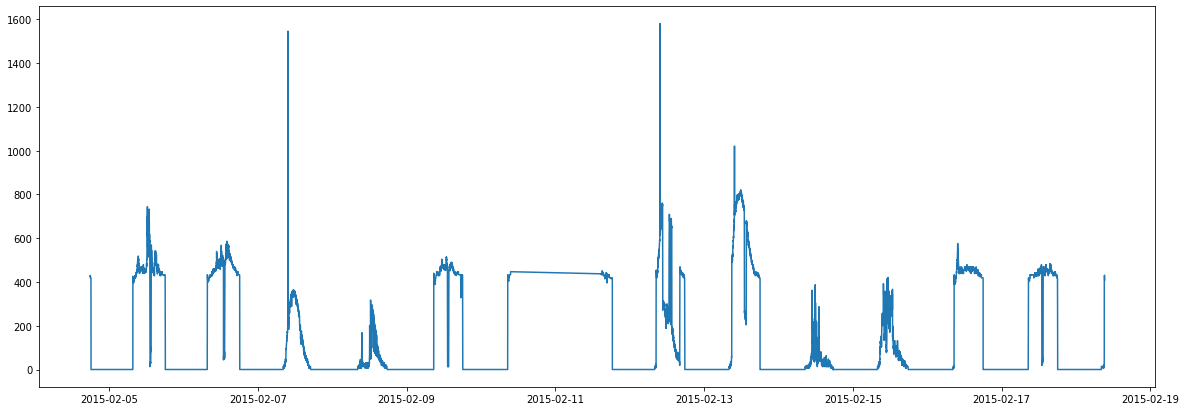

In [43]:
plt.figure(figsize=(20,7))
plt.plot(ts)
plt.show()

In [44]:
ts=df['CO2']

In [45]:
ts.index

DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:51:00',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:55:00',
               '2015-02-04 17:57:00', '2015-02-04 17:57:00',
               '2015-02-04 17:58:00', '2015-02-04 18:00:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:10:00',
               '2015-02-18 09:11:00', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:16:00',
               '2015-02-18 09:17:00', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', name='date', length=17895, freq=None)

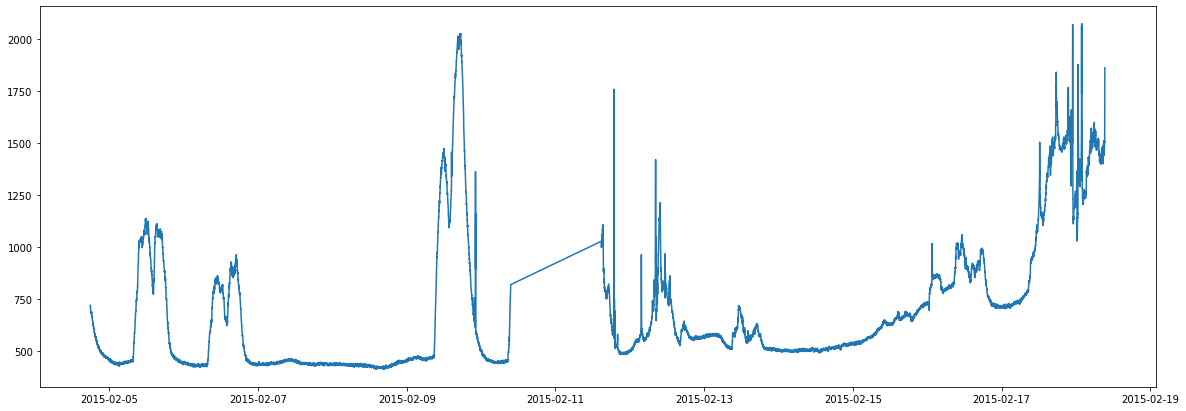

In [46]:
plt.figure(figsize=(20,7))
plt.plot(ts)
plt.show()

In [47]:
index = pd.date_range(start=ts.index[0], end=ts.index[len(ts)-1], freq='min')
index

DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:52:00',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:56:00',
               '2015-02-04 17:57:00', '2015-02-04 17:58:00',
               '2015-02-04 17:59:00', '2015-02-04 18:00:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:11:00',
               '2015-02-18 09:12:00', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:17:00',
               '2015-02-18 09:18:00', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', length=19649, freq='T')

In [48]:
#df.loc[df['Light'] == 0, 'Light'] = 1

In [49]:
ts = pd.Series(ts.values, index)
plt.figure(figsize=(20,7))
plt.plot(ts)
plt.show()

ValueError: Length of passed values is 17895, index implies 19649

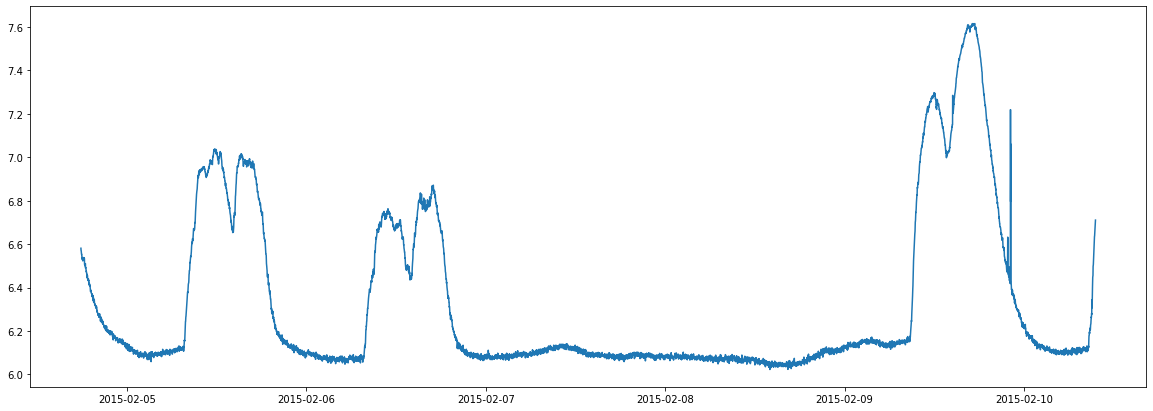

In [9]:
ts_log = pd.Series(np.log(ts), index=ts.index)
plt.figure(figsize=(20,7))
plt.plot(ts_log)
plt.show()

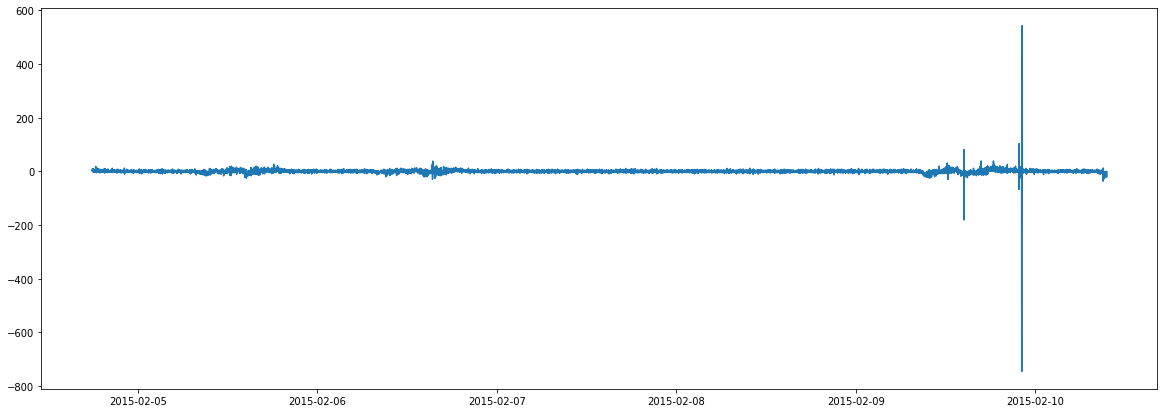

In [10]:
ts_diff = pd.Series(ts[:-1].values - ts[1:].values, index=ts.index[1:])
plt.figure(figsize=(20,7))
plt.plot(ts_diff)
plt.show()

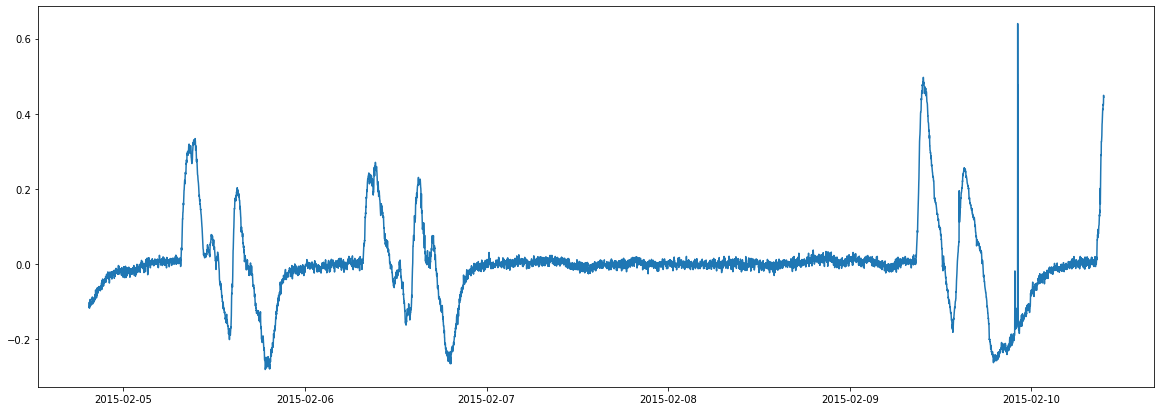

In [11]:
window = 100
ts_log_mov_diff = pd.Series(ts_log - ts_log.rolling(window, center=False).mean(), index=ts.index)
plt.figure(figsize=(20,7))
plt.plot(ts_log_mov_diff)
plt.show()

In [12]:
from statsmodels.tsa.stattools import acf, pacf

In [13]:
lag_acf = acf(ts, nlags=100)
lag_pacf = pacf(ts, nlags=100, method='ols')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


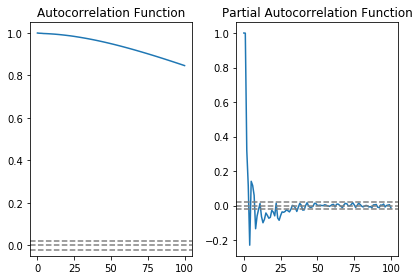

In [14]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

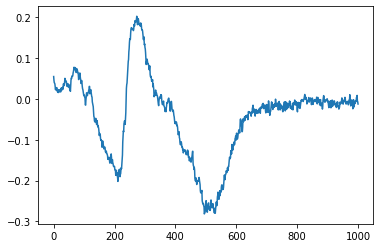

In [16]:
plt.plot(ts_log_mov_diff.values[1000:2001])
plt.show()

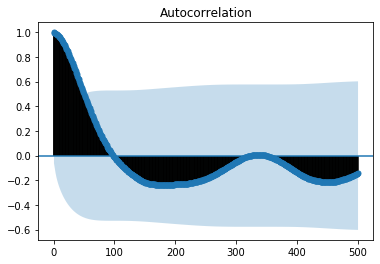

In [17]:
plot_acf(ts_log_mov_diff.values[1000:2001], lags=500)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


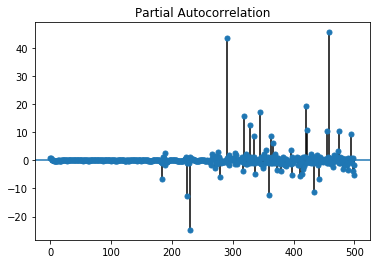

In [18]:
plot_pacf(ts_log_mov_diff.values[1000:2001], lags=500)
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
dftest = adfuller(ts_log, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.096177
p-value                           0.026837
#Lags Used                       35.000000
Number of Observations Used    8107.000000
Critical Value (1%)              -3.431157
Critical Value (5%)              -2.861897
Critical Value (10%)             -2.566960
dtype: float64


In [21]:
dftest = adfuller(ts, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.639003
p-value                           0.005058
#Lags Used                       35.000000
Number of Observations Used    8107.000000
Critical Value (1%)              -3.431157
Critical Value (5%)              -2.861897
Critical Value (10%)             -2.566960
dtype: float64


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [23]:
index = pd.date_range(start=ts.index[0], end=ts.index[len(ts)-1], freq='1T')
ts = pd.Series(ts.values, index)

In [24]:
index

DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:52:00',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:56:00',
               '2015-02-04 17:57:00', '2015-02-04 17:58:00',
               '2015-02-04 17:59:00', '2015-02-04 18:00:00',
               ...
               '2015-02-10 09:24:00', '2015-02-10 09:25:00',
               '2015-02-10 09:26:00', '2015-02-10 09:27:00',
               '2015-02-10 09:28:00', '2015-02-10 09:29:00',
               '2015-02-10 09:30:00', '2015-02-10 09:31:00',
               '2015-02-10 09:32:00', '2015-02-10 09:33:00'],
              dtype='datetime64[ns]', length=8143, freq='T')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


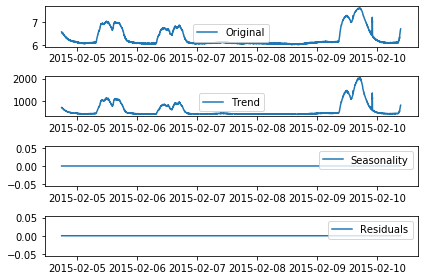

In [48]:
decomposition = sm.tsa.seasonal_decompose(pd.Series(ts.values, index), freq=1)
#decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [26]:
from tslearn.generators import random_walks

In [27]:
ts_random = random_walks(n_ts=1, sz=len(ts), d=1)

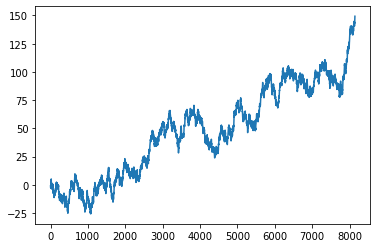

In [28]:
plt.plot(ts_random.ravel())
plt.show()

In [29]:
dftest = adfuller(ts_random.ravel(), autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -0.091350
p-value                           0.950293
#Lags Used                        3.000000
Number of Observations Used    8139.000000
Critical Value (1%)              -3.431154
Critical Value (5%)              -2.861895
Critical Value (10%)             -2.566959
dtype: float64


In [30]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


def r2_score(y_true, y_pred, ts):
    mu = np.mean(ts)
    total = np.sum((y_true - mu) ** 2)
    residuals = np.sum((y_true - y_pred) ** 2)
    return 1 - (residuals / total)


def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, ts):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred, ts),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [38]:
split_index = 6500
train, test = ts_log.iloc[:split_index], ts_log.iloc[split_index:]

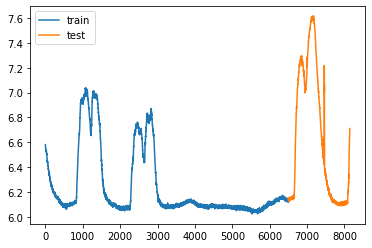

In [39]:
plt.plot(range(split_index), train, label='train')
plt.plot(range(split_index, len(ts)), test, label='test')
plt.legend()
plt.show()

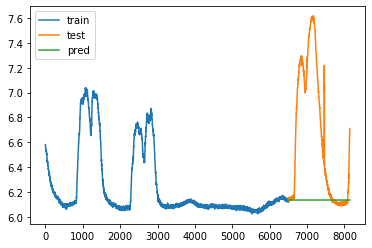

MAE 0.513
RMSE 0.736
MAD 0.252
R2 0.988
MAPE 0.084
MAXAPE 0.241
TAPE 137.321


In [40]:
smoothing_level = 0.1
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

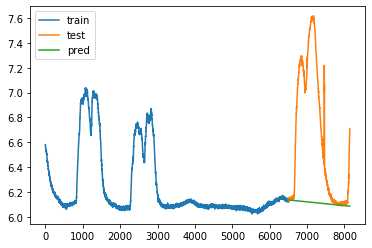

MAE 0.526
RMSE 0.748
MAD 0.280
R2 0.987
MAPE 0.086
MAXAPE 0.245
TAPE 141.163


In [41]:
smoothing_level=0.1
smoothing_slope=0.05

holt = Holt(train).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
pred = holt.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

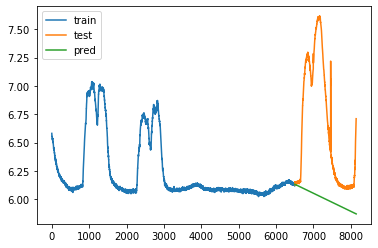

MAE 0.635
RMSE 0.812
MAD 0.409
R2 0.985
MAPE 0.105
MAXAPE 0.264
TAPE 173.242


In [42]:
seasonal_periods=24

es = ExponentialSmoothing(train, seasonal_periods=seasonal_periods, trend='add', seasonal='add').fit()
pred = es.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

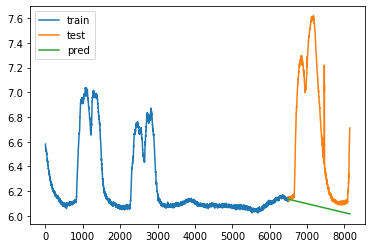

MAE 0.561
RMSE 0.767
MAD 0.322
R2 0.987
MAPE 0.092
MAXAPE 0.251
TAPE 151.279


In [43]:
sarimax = SARIMAX(train).fit(disp=False)
pred = sarimax.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

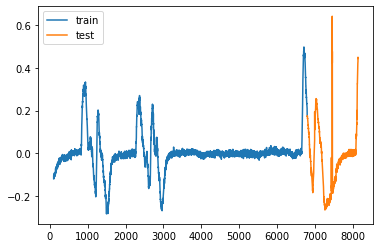

In [45]:
split_index = 6800
train, test = ts_log_mov_diff.iloc[:split_index], ts_log_mov_diff.iloc[split_index:]

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.legend()
plt.show()

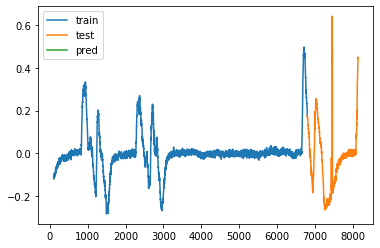

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [46]:
smoothing_level = 0.1
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))